In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/trainedusingalldatamodel/sr.img_net.mse.final_model5.no_patch.weights.best.hdf5


[Prject cloned](https://github.com/hiverkiya/Image-Super-Resolution-Using-Keras) for more [preprocessing and trained for few data and epoches](https://colab.research.google.com/drive/1y3FAUsTMKpDVodSmvt-OFxL5zJjiZ6eC?usp=sharing) stages
#Cars trained dataset of 8141 high quality images 

In [2]:
import numpy as np
np.random.seed(0)

from skimage.transform import resize, rescale

import matplotlib.pyplot as plt
from matplotlib import pyplot

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Conv2DTranspose, UpSampling2D, add
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers




print(tf.__version__)

2.4.1


#download .npy files saved in drive using colab

[download from gdrive](https://medium.com/analytics-vidhya/how-to-import-data-from-google-drive-into-kaggle-notebook-3af68a1f0d4)

In [3]:
!conda install -y gdown


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - gdown


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    filelock-3.0.12            |     pyh9f0ad1d_0          10 KB  conda-forge
    gdown-3.13.0               |     pyhd8ed1ab_0          12 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          22 KB

The following NEW packages will be INSTALLED:

  filelock           conda-forge/noarch::filelock-3.0.12-pyh9f0ad1d_0
  gdown              conda-forge/noarch::gdown-3.13.0-pyhd8ed1ab_0



gdown-3.13.0         | 12 KB     | ##################################### | 100% 
filelock-

In [4]:
#!gdown --id 1Edjoxw0URUZGqsrn_yb9aHeIO5sHNZtX

In [5]:
#!gdown --id 1EgniBXFeJVbLb_W7IekUXjQP1E7tbt8S

In [6]:
#!gdown --id 1EljGQbTV82TU-m29bstxI52atTWlMAtV

In [7]:
!gdown --id 1Em0vVggHuMeYA4IV90i0Flcny-mEJQU6

Downloading...
From: https://drive.google.com/uc?id=1Em0vVggHuMeYA4IV90i0Flcny-mEJQU6
To: /kaggle/working/X4.npy
1.87GB [00:12, 153MB/s] 


In [8]:
#now concatenate
#cars_train = np.concatenate((np.load('X1.npy'), np.load('X2.npy'), np.load('X3.npy')))

In [9]:
#train_data in high_resolution
#print(cars_train.shape)

In [10]:
cars = np.load('X4.npy') #contains 2432 images

In [11]:
#test_data in high resolution
#print(cars_test.shape)

In [12]:
#rescale up normally leads to loss of quality as the dimensions
#is higher than original image
#get back to original dimension degrade the quality
#d1 = rescale(rescale(cars[:500], 2), 0.5)

In [13]:
def preprocessing_fun(img):
    img1 = np.asarray(rescale(rescale(img, 2), 0.5, anti_aliasing=True))
    return img1


In [14]:
lr_test = [preprocessing_fun(cars[i]) for i in range(100)]

In [15]:
lr_test1 = [preprocessing_fun(cars[i]) for i in range(100, 200)]

In [16]:
lr_test2 = [preprocessing_fun(cars[i]) for i in range(200, 300)]

In [17]:
lr = np.concatenate((lr_test, lr_test1,lr_test2))

In [18]:
cars_train = cars[:250]
cars_test = cars[250:300]

In [19]:
print(len(cars_test))

50


In [20]:
lr_train = lr[:250]
lr_test = lr[250:300]

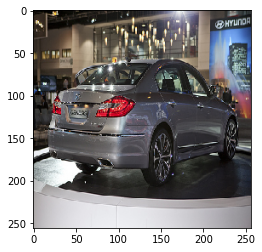

In [21]:
plt.imshow(cars_train[0])

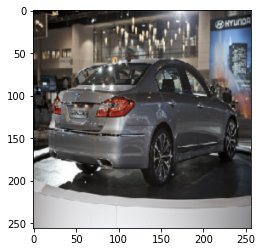

In [22]:
plt.imshow(lr_train[0])

In [23]:
#lets do the preprocessing using for both, finding low resolution
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tri=ImageDataGenerator()

train = tri.flow(
    lr_train,
    cars_train,
    batch_size=16
    #class_mode="input", #for autoencoder model no class so set this as input
   )

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
te=ImageDataGenerator()

test = te.flow(
    lr_test,
    cars_test,
    batch_size=16
    #class_mode="input", #for autoencoder model no class so set this as input
   )

In [25]:
input_img = Input(shape=(256, 256, 3))
l1 = Conv2D(64, (3, 3), padding = 'same', activation = 'relu', 
            activity_regularizer = regularizers.l1(10e-10))(input_img)

l2 = Conv2D(64, (3, 3), padding = 'same', activation = 'relu', 
            activity_regularizer = regularizers.l1(10e-10))(l1)

l3 = MaxPooling2D(padding = 'same')(l2)
l3 = Dropout(0.3)(l3)

l4 = Conv2D(128, (3, 3),  padding = 'same', activation = 'relu', 
            activity_regularizer = regularizers.l1(10e-10))(l3)

l5 = Conv2D(128, (3, 3), padding = 'same', activation = 'relu', 
            activity_regularizer = regularizers.l1(10e-10))(l4)
l6 = MaxPooling2D(padding = 'same')(l5)

l7 = Conv2D(256, (3, 3), padding = 'same', activation = 'relu', 
            activity_regularizer = regularizers.l1(10e-10))(l6)
l8 = UpSampling2D()(l7)

l9 = Conv2D(128, (3, 3), padding = 'same', activation = 'relu',
            activity_regularizer = regularizers.l1(10e-10))(l8)

l10 = Conv2D(128, (3, 3), padding = 'same', activation = 'relu',
             activity_regularizer = regularizers.l1(10e-10))(l9)

l11 = add([l5, l10])
l12 = UpSampling2D()(l11)

l13 = Conv2D(64, (3, 3), padding = 'same', activation = 'relu',
             activity_regularizer = regularizers.l1(10e-10))(l12)
l14 = Conv2D(64, (3, 3), padding = 'same', activation = 'relu',
             activity_regularizer = regularizers.l1(10e-10))(l13)

l15 = add([l14, l2])

decoded = Conv2D(3, (3, 3), padding = 'same', 
                 activation = 'relu', activity_regularizer = regularizers.l1(10e-10))(l15)

autoencoder = Model(input_img, decoded)
#autoencoder_hfenn = Model(input_img, decoded)

In [26]:
autoencoder.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 128, 128, 64) 0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [27]:
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [38]:


history=autoencoder.fit_generator(train, epochs=20, 
                        shuffle=True,
                       validation_data=test)
  
                    
                              




Epoch 1/20
16/16 [==============================] - 5s 313ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 2/20
16/16 [==============================] - 5s 311ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 3/20
16/16 [==============================] - 5s 309ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 4/20
16/16 [==============================] - 5s 310ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 5/20
16/16 [==============================] - 5s 308ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 6/20
16/16 [==============================] - 5s 310ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 7/20
16/16 [==============================] - 5s 311ms/step - loss: 0.0010 - val_loss: 9.9114e-04
Epoch 8/20
16/16 [==============================] - 5s 310ms/step - loss: 9.6481e-04 - val_loss: 9.6225e-04
Epoch 9/20
16/16 [==============================] - 5s 307ms/step - loss: 9.3695e-04 - val_loss: 9.3335e-04
Epoch 10/20
16/16 [==============================] - 5s 309ms/step - loss: 9.137

In [39]:
# saving whole model
autoencoder.save('autoencoder_SR_model.h5')
 
# loading whole model
from keras.models import load_model
modelsr = load_model('autoencoder_SR_model.h5')

In [40]:
sr1 = np.clip(modelsr.predict(lr), 0.0, 1.0)

In [41]:
image_index = 4

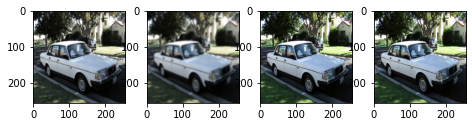

In [42]:
plt.figure(figsize = (20, 20))
i = 1
ax = plt.subplot(10, 10, i)
plt.imshow(lr_train[image_index])
i += 1
ax = plt.subplot(10, 10, i)
plt.imshow(lr_train[image_index], interpolation = "bicubic")
i += 1
ax = plt.subplot(10, 10, i)
plt.imshow(cars_train[image_index])
i += 1
ax = plt.subplot(10, 10, i)
plt.imshow(sr1[image_index])
plt.show()